In [202]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [203]:
flower = pd.read_csv('Iris.csv')

In [204]:
flower

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [205]:
flower.shape

(150, 6)

***NaN in columns*** 

In [206]:
flower.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***NaN in types of Species***

In [207]:
flower['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

***Duplicates in the dataset***

In [208]:
flower.duplicated().sum()

0

In [209]:
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

***Outliers in Features***

<Axes: xlabel='SepalLengthCm'>

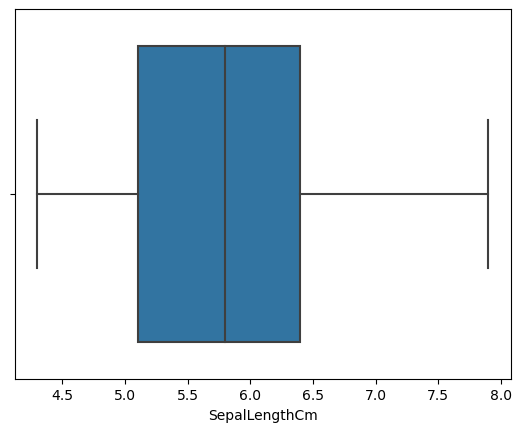

In [210]:
sns.boxplot(x =flower['SepalLengthCm'] )

<Axes: xlabel='SepalWidthCm'>

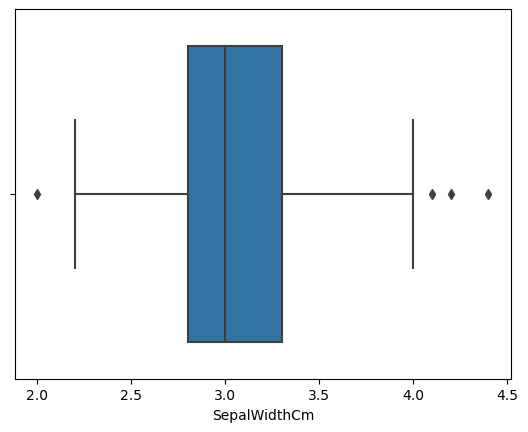

In [211]:
sns.boxplot(x =flower['SepalWidthCm'] )

<Axes: xlabel='PetalLengthCm'>

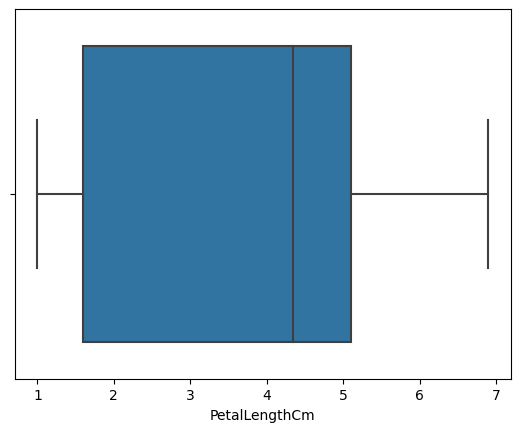

In [212]:
sns.boxplot(x =flower['PetalLengthCm'] )

<Axes: xlabel='PetalWidthCm'>

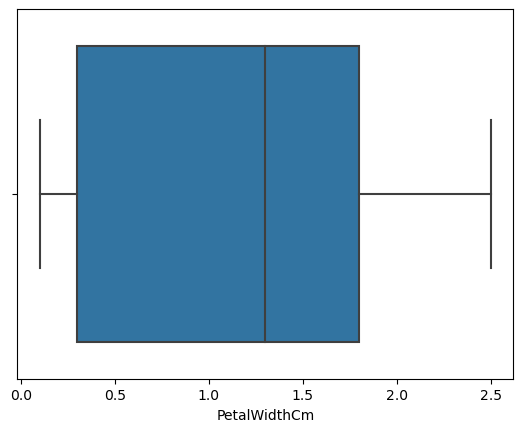

In [213]:
sns.boxplot(x =flower['PetalWidthCm'] )

***From Above, we can see SepalWidthCm has an Outlier. I'm using Capping Method to remove Outlier***

In [214]:
percentile25 = flower['SepalWidthCm'].quantile(0.25)
percentile75 = flower['SepalWidthCm'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
flower['SepalWidthCm'] = np.where( flower['SepalWidthCm'] > upper_limit,
                        upper_limit,
                        np.where( flower['SepalWidthCm'] < lower_limit,
                                    lower_limit,
                                    flower['SepalWidthCm']
                                            )

)

<Axes: xlabel='SepalWidthCm'>

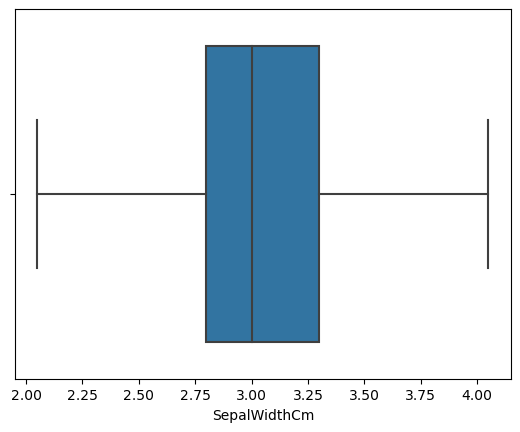

In [215]:
sns.boxplot(x =flower['SepalWidthCm'] )

In [216]:
x = flower.drop(columns=['Id','Species'])

In [217]:
y = flower['Species']

In [218]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

***Logistic Regression***

In [219]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_lr)*100,'%')

100.0 %


In [220]:
Scores_lr = pd.DataFrame({'Actual':y_test,'Predictions':y_pred_lr})
Scores_lr.head()

,Actual,Predictions
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


***SVC***

In [221]:
from sklearn.svm import SVC
s = SVC()
s.fit(x_train,y_train)
y_pred_s = s.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_s)*100,'%')

100.0 %


In [222]:
Scores_s = pd.DataFrame({'Actual':y_test,'Predictions':y_pred_s})
Scores_s.head()

,Actual,Predictions
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


 ***Gausian Nb***

In [223]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,nb_pred)*100,'%')

100.0 %


In [224]:
Scores_nb = pd.DataFrame({'Actual':y_test,'Predictions':nb_pred})
Scores_nb.head()

,Actual,Predictions
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


***KNeighborsClassifier***

In [225]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred_kn = kn.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_kn)*100,'%')

100.0 %


In [226]:
Scores_kn = pd.DataFrame({'Actual':y_test,'Predictions':y_pred_kn})
Scores_kn.head()

,Actual,Predictions
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


***DecisionTreeClassifier***

In [227]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_dtc)*100,'%')

100.0 %


In [228]:
Scores_dtc = pd.DataFrame({'Actual':y_test,'Predictions':y_pred_dtc})
Scores_dtc.head()

,Actual,Predictions
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
